In [1]:
from dieboldmariano import dm_test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the predictions from the CSV file

# Baseline Models 
predictions_baseline = pd.read_csv("Results/model_predictions.csv (5-window).csv")
# Convert 'DlyCalDt' to datetime
predictions_baseline['DlyCalDt'] = pd.to_datetime(predictions_baseline['DlyCalDt'])

# Sort by date
predictions_baseline.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)

predictions_linear = predictions_baseline.copy()
predictions_linear = predictions_baseline.drop(columns=['RF','NN1','NN2','NN3','NN4','NN5','GBRT'])
predictions_nonlinear = predictions_baseline.copy()
predictions_nonlinear = predictions_baseline.drop(columns=['Ridge','OLS','ElasticNet','Lasso','GLM'])

predictions_baseline

,PERMNO,DlyCalDt,ExcessReturn,Ridge,OLS,ElasticNet,Lasso,GLM,RF,NN1,NN2,NN3,NN4,NN5,GBRT
0,10138,2016-01-04,-0.018191,0.001656,0.001656,0.000936,0.000671,0.001465,0.000419,0.000662,0.001612,-0.001009,0.000794,0.000903,0.000942
1,17778,2016-01-04,-0.007616,0.001042,0.001042,0.000936,0.000710,0.001242,0.000417,0.000258,-0.000244,-0.002614,0.000827,0.000759,0.000834
2,28388,2016-01-04,-0.015413,0.001246,0.001246,0.000956,0.000716,0.001136,0.000421,0.000818,0.001574,0.000080,0.000596,0.003020,0.000689
3,34746,2016-01-04,-0.027370,0.001118,0.001118,0.000842,0.000659,0.001255,0.000406,-0.001097,0.001266,-0.002484,0.000528,0.001238,0.000889
4,35044,2016-01-04,-0.016674,0.001194,0.001194,0.000826,0.000631,0.001268,0.000417,-0.000303,0.001240,-0.003124,0.000521,0.001083,0.000787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112395,86455,2024-12-31,0.000924,0.000539,0.000539,0.000789,0.000689,0.000884,0.000415,-0.000332,0.000651,-0.001671,0.000686,0.001428,0.000738
112396,86755,2024-12-31,-0.008607,0.000525,0.000525,0.000778,0.000736,0.000912,0.000415,0.000592,0.000599,-0.000641,0.000468,0.002195,0.001275
112397,86868,2024-12-31,-0.001733,-0.000002,-0.000002,0.000432,0.000625,0.000157,0.000414,-0.000107,0.000806,-0.000942,0.000860,0.000832,0.000356
112398,87267,2024-12-31,-0.002370,0.001420,0.001420,0.000838,0.000771,0.000939,0.000418,0.000791,0.000597,-0.003154,0.000192,0.001357,0.000699


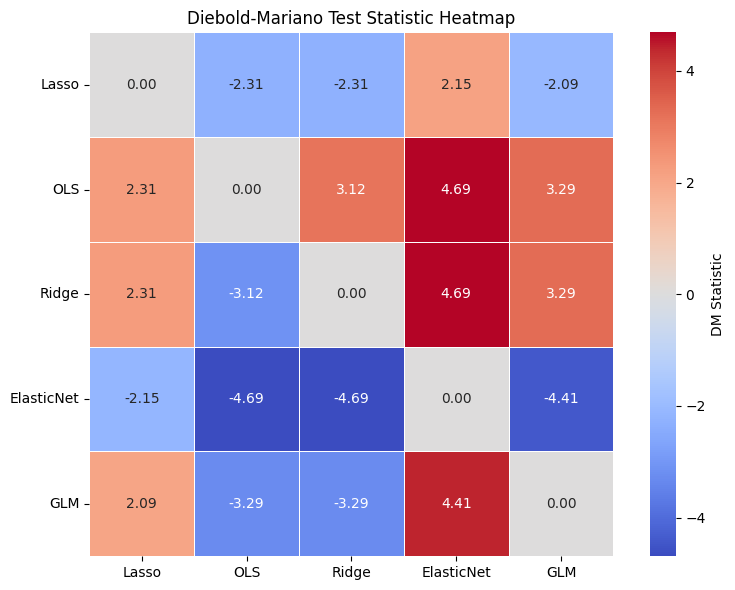

In [3]:
# === Step 1: Collect model predictions ===
linear_model_preds = {
    'Lasso': np.array(predictions_linear['Lasso']),
    'OLS': np.array(predictions_linear['OLS']),
    'Ridge': np.array(predictions_linear['Ridge']),
    'ElasticNet': np.array(predictions_linear['ElasticNet']),
    'GLM': np.array(predictions_linear['GLM'])
}

model_names = list(linear_model_preds.keys())
n = len(model_names)

# === Step 2: Create a DM statistic matrix ===
dm_matrix = np.zeros((n, n))  # DM statistic matrix

y_true = np.array(predictions_linear['ExcessReturn'])

for i in range(n):
    for j in range(n):
        if i == j:
            dm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, linear_model_preds[model_names[i]], linear_model_preds[model_names[j]], h=1)
            dm_matrix[i, j] = stat

# === Step 3: Convert to DataFrame for plotting ===
dm_df = pd.DataFrame(dm_matrix, index=model_names, columns=model_names)

# === Step 4: Plot heatmap ===
plt.figure(figsize=(8, 6))
sns.heatmap(dm_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

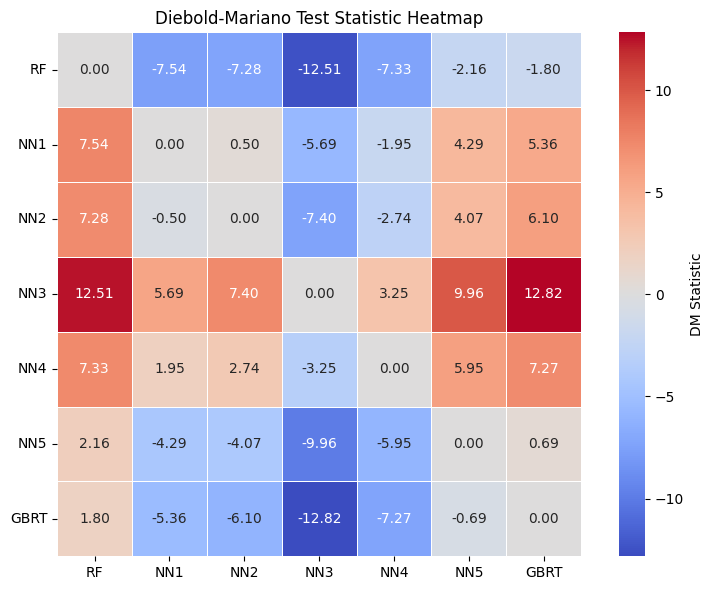

In [4]:
nonlinear_model_preds = {
    'RF': np.array(predictions_nonlinear['RF']),
    'NN1': np.array(predictions_nonlinear['NN1']),
    'NN2': np.array(predictions_nonlinear['NN2']),      
    'NN3': np.array(predictions_nonlinear['NN3']),
    'NN4': np.array(predictions_nonlinear['NN4']),
    'NN5': np.array(predictions_nonlinear['NN5']),
    'GBRT': np.array(predictions_nonlinear['GBRT'])
}

model_names = list(nonlinear_model_preds.keys())
n = len(model_names)

dm_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            dm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, nonlinear_model_preds[model_names[i]], nonlinear_model_preds[model_names[j]], h=1)
            dm_matrix[i, j] = stat

dm_df = pd.DataFrame(dm_matrix, index=model_names, columns=model_names)

# === Step 4: Plot heatmap ===
plt.figure(figsize=(8, 6))
sns.heatmap(dm_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [5]:
# Comparing linear and nonlinear models using the Diebold-Mariano test

predictions_chronos = pd.read_csv("Results/chronos(5-day).csv")

predictions_chronos['DlyCalDt'] = pd.to_datetime(predictions_chronos['DlyCalDt'])

predictions_chronos.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)

chronos_models_preds = {
    'chr_bolt_tiny': np.array(predictions_chronos['y_chr_bolt_tiny']),
    'chr_bolt_mini': np.array(predictions_chronos['y_chr_bolt_mini']),
    'chr_bolt_small': np.array(predictions_chronos['y_chr_bolt_small']),
    'chr_bolt_base': np.array(predictions_chronos['y_chr_bolt_base']),
    'chr_t5_tiny': np.array(predictions_chronos['y_chr_t5_tiny']),
    'chr_t5_mini': np.array(predictions_chronos['y_chr_t5_mini']),
    'chr_t5_small': np.array(predictions_chronos['y_chr_t5_small'])
}

chronos_models = list(chronos_models_preds.keys())
n = len(chronos_models)

In [6]:
predictions_chronos

,PERMNO,ExcessReturn,DlyCalDt,y_chr_bolt_tiny,y_chr_bolt_mini,y_chr_bolt_small,y_chr_bolt_base,y_chr_t5_tiny,y_chr_t5_mini,y_chr_t5_small
0,10138,-0.018191,2016-01-04,-0.010642,-0.011297,-0.009591,-0.007507,-0.007548,-0.003380,-0.003928
1,17778,-0.007616,2016-01-04,-0.011813,-0.011938,-0.009653,-0.008324,-0.008974,-0.002516,-0.000681
2,28388,-0.015413,2016-01-04,-0.016536,-0.017005,-0.016556,-0.013321,-0.004105,-0.006542,-0.006307
3,34746,-0.027370,2016-01-04,-0.007722,-0.009680,-0.007421,-0.006852,-0.006471,-0.005552,-0.003093
4,35044,-0.016674,2016-01-04,-0.005367,-0.006941,-0.004597,-0.005088,-0.005068,-0.005366,-0.002771
...,...,...,...,...,...,...,...,...,...,...
112395,86455,0.000924,2024-12-31,-0.012313,-0.014217,-0.013456,-0.010389,-0.006726,-0.009496,-0.004525
112396,86755,-0.008607,2024-12-31,-0.016774,-0.019512,-0.017278,-0.014044,-0.011223,-0.013500,-0.007489
112397,86868,-0.001733,2024-12-31,-0.007754,-0.010670,-0.007352,-0.004432,-0.002583,-0.004695,-0.004053
112398,87267,-0.002370,2024-12-31,-0.020578,-0.022849,-0.021085,-0.018935,-0.011643,-0.016488,-0.013070


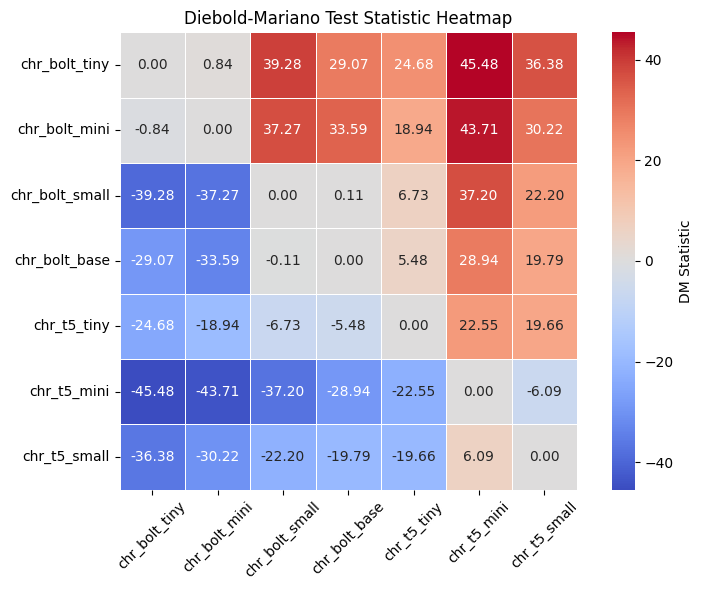

In [7]:
chronos_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            chronos_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, chronos_models_preds[chronos_models[i]], chronos_models_preds[chronos_models[j]], h=1)
            chronos_matrix[i, j] = stat

chronos_df = pd.DataFrame(chronos_matrix, index=chronos_models, columns=chronos_models)

# === Step 4: Plot heatmap ===
plt.figure(figsize=(8, 6))
sns.heatmap(chronos_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Comparing linear and nonlinear models using the Diebold-Mariano test

predictions_timesfm = pd.read_csv("Results/timesfm(5-day).csv")

predictions_timesfm['DlyCalDt'] = pd.to_datetime(predictions_timesfm['DlyCalDt'])

predictions_timesfm.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)

timesfm_models_preds = {
    'tfm1': np.array(predictions_timesfm['y_tfm1']),
    'tfm2': np.array(predictions_timesfm['y_tfm2'])
}
timesfm_models = list(timesfm_models_preds.keys())
n = len(timesfm_models)

timesfm_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            timesfm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, timesfm_models_preds[timesfm_models[i]], timesfm_models_preds[timesfm_models[j]], h=1)
            timesfm_matrix[i, j] = stat

timesfm_df = pd.DataFrame(timesfm_matrix, index=timesfm_models, columns=timesfm_models)

timesfm_df

,tfm1,tfm2
tfm1,0.000000,-27.789217
tfm2,27.789217,0.000000


In [9]:
# Comparing linear and nonlinear models using the Diebold-Mariano test

predictions_uni2ts = pd.read_csv("Results/uni2ts(5-day)predictions.csv")
predictions_uni2ts['DlyCalDt'] = pd.to_datetime(predictions_uni2ts['DlyCalDt'])

predictions_uni2ts.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)

uni2ts_models_preds = {
    'moirai_s': np.array(predictions_uni2ts['y_moirai_s']),
    'moirai_moe_s': np.array(predictions_uni2ts['y_moirai_moe_s']),
    'moirai_moe_b': np.array(predictions_uni2ts['y_moirai_moe_b'])
}
uni2ts_models = list(uni2ts_models_preds.keys())
n = len(uni2ts_models)

uni2ts_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            uni2ts_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, uni2ts_models_preds[uni2ts_models[i]], uni2ts_models_preds[uni2ts_models[j]], h=1)
            uni2ts_matrix[i, j] = stat

uni2ts_df = pd.DataFrame(uni2ts_matrix, index=uni2ts_models, columns=uni2ts_models)

uni2ts_df

,moirai_s,moirai_moe_s,moirai_moe_b
moirai_s,0.000000,4.079129,4.036888
moirai_moe_s,-4.079129,0.000000,-7.441598
moirai_moe_b,-4.036888,7.441598,0.000000


In [17]:
# Comparing all the models with each other 

all_models_preds = {
    **linear_model_preds,
    **nonlinear_model_preds,
    **chronos_models_preds,
    **timesfm_models_preds,
    **uni2ts_models_preds
}


model_names = list(all_models_preds.keys())
n = len(model_names)

dm_matrix = np.zeros((n, n))  # DM statistic matrix
y_true = np.array(predictions_linear['ExcessReturn'])

for i in range(n):
    for j in range(n):
        if i == j:
            dm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, all_models_preds[model_names[i]], all_models_preds[model_names[j]], h=1)
            dm_matrix[i, j] = stat

dm_df = pd.DataFrame(dm_matrix, index=model_names, columns=model_names)
dm_df
# === Step 3: Convert to DataFrame for plotting ===

,Lasso,OLS,Ridge,ElasticNet,GLM,RF,NN1,NN2,NN3,NN4,...,chr_bolt_small,chr_bolt_base,chr_t5_tiny,chr_t5_mini,chr_t5_small,tfm1,tfm2,moirai_s,moirai_moe_s,moirai_moe_b
Lasso,0.000000,-2.307669,-2.307669,2.154874,-2.085634,0.328297,-5.493011,-5.503606,-10.091590,-6.130036,...,-44.011701,-41.045535,-38.679410,-30.784821,-31.847304,-31.798628,-37.091261,-4.126433,-50.876840,-15.708641
OLS,2.307669,0.000000,3.119241,4.691648,3.285931,2.039287,-5.503314,-5.850305,-11.008544,-6.089073,...,-42.239796,-39.529362,-37.444693,-29.131564,-30.723487,-28.694595,-35.027091,-4.126014,-49.287754,-15.628145
Ridge,2.307669,-3.119241,0.000000,4.691648,3.285928,2.039286,-5.503314,-5.850305,-11.008544,-6.089073,...,-42.239796,-39.529362,-37.444694,-29.131564,-30.723487,-28.694595,-35.027091,-4.126014,-49.287754,-15.628145
ElasticNet,-2.154874,-4.691648,-4.691648,0.000000,-4.412317,-0.124258,-5.997712,-6.209719,-11.029293,-6.593510,...,-43.392794,-40.534386,-38.189559,-30.239428,-31.425959,-30.828117,-36.361484,-4.126581,-50.801443,-15.733675
GLM,2.085634,-3.285931,-3.285928,4.412317,0.000000,1.856321,-5.563763,-5.919323,-11.067049,-6.145179,...,-42.272037,-39.557073,-37.469942,-29.166239,-30.748733,-28.748664,-35.063635,-4.126059,-49.369846,-15.636169
RF,-0.328297,-2.039287,-2.039286,0.124258,-1.856321,0.000000,-7.538356,-7.277518,-12.505050,-7.326539,...,-41.808580,-39.143356,-37.599106,-28.721422,-31.121017,-28.111122,-34.634816,-4.126543,-47.865374,-15.705105
NN1,5.493011,5.503314,5.503314,5.997712,5.563763,7.538356,0.000000,0.496508,-5.694875,-1.954251,...,-39.420071,-37.188462,-35.345323,-26.121230,-28.838561,-23.956441,-32.191927,-4.123072,-39.063655,-15.038105
NN2,5.503606,5.850305,5.850305,6.209719,5.919323,7.277518,-0.496508,0.000000,-7.398580,-2.740794,...,-38.800762,-36.635832,-34.511138,-25.692311,-27.912160,-23.771218,-31.360864,-4.123287,-40.071474,-15.079161
NN3,10.091590,11.008544,11.008544,11.029293,11.067049,12.505050,5.694875,7.398580,0.000000,3.247835,...,-38.452134,-36.345507,-33.883862,-24.889876,-27.047352,-22.565687,-30.737617,-4.120178,-36.197544,-14.522537
NN4,6.130036,6.089073,6.089073,6.593510,6.145179,7.326539,1.954251,2.740794,-3.247835,0.000000,...,-38.699007,-36.586851,-34.135904,-25.262018,-27.279930,-22.926788,-31.246889,-4.121827,-35.411972,-14.771878


In [11]:
dm_df.to_csv("Results/DM_Test_Results.csv")

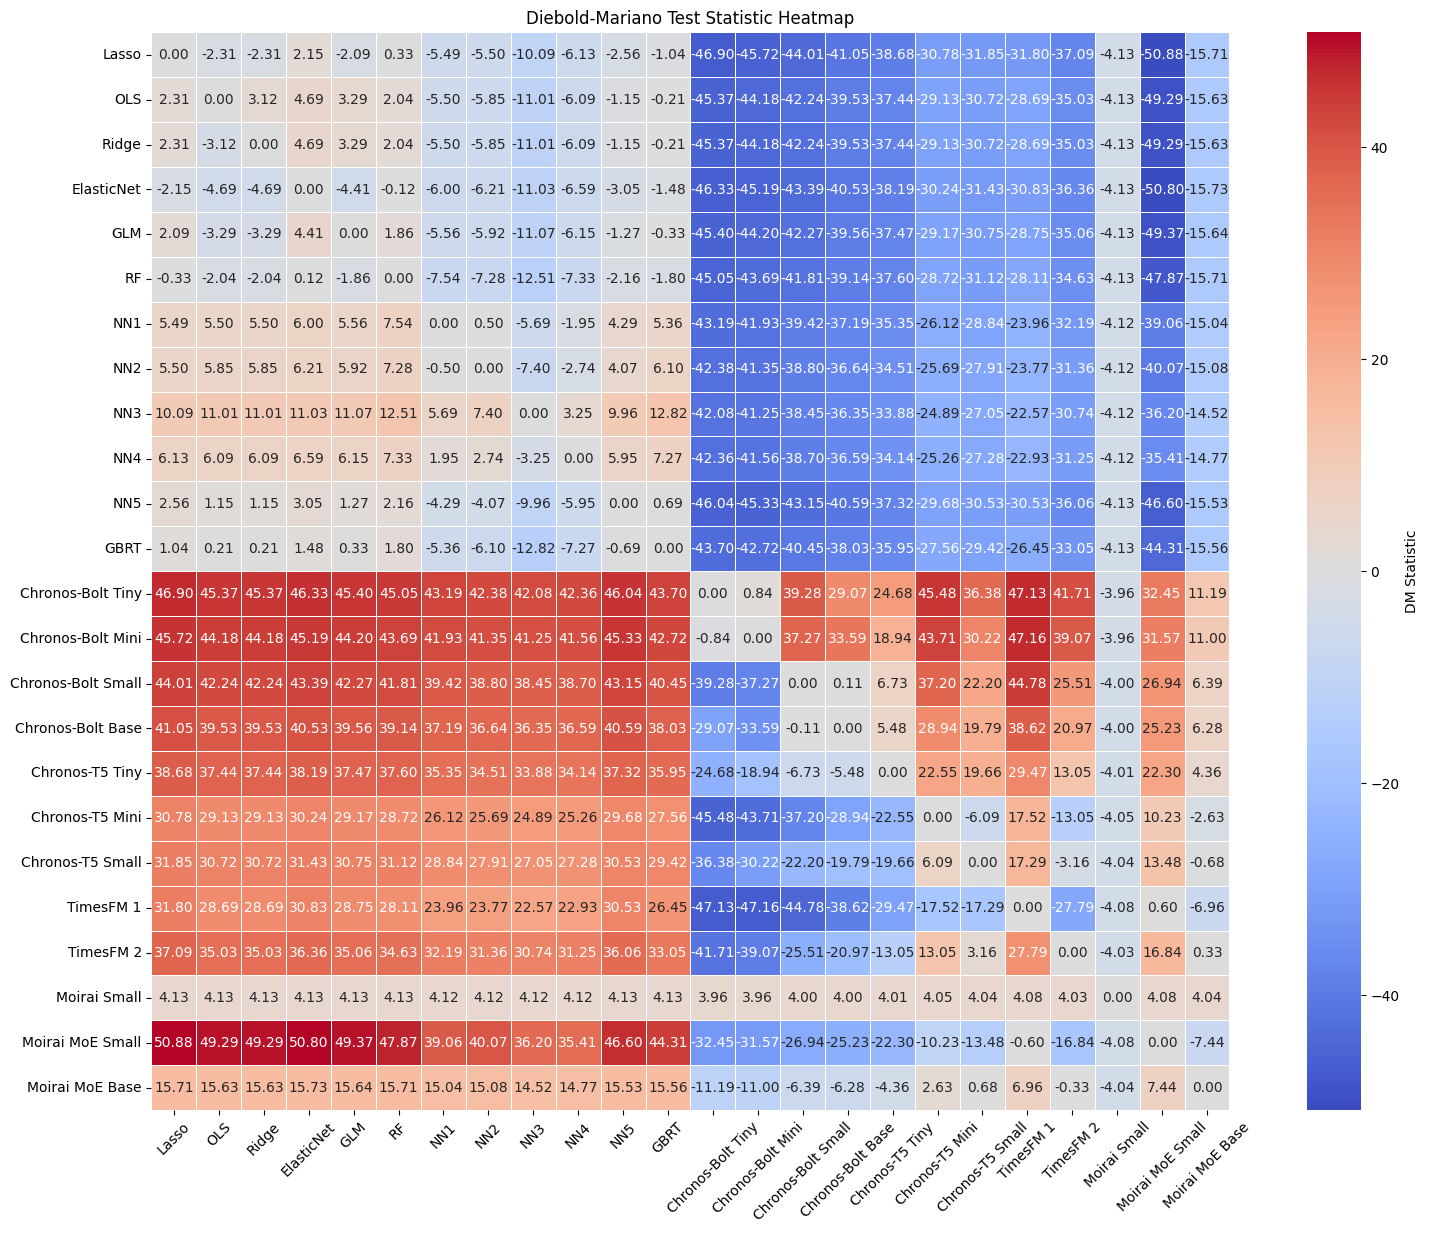

In [18]:
# === Step 4: Plot heatmap ===

model_name_map = {
    'chr_bolt_tiny': 'Chronos-Bolt Tiny',
    'chr_bolt_mini': 'Chronos-Bolt Mini',
    'chr_bolt_small': 'Chronos-Bolt Small',
    'chr_bolt_base': 'Chronos-Bolt Base',
    'chr_t5_tiny': 'Chronos-T5 Tiny',
    'chr_t5_mini': 'Chronos-T5 Mini',
    'chr_t5_small': 'Chronos-T5 Small',
    'moirai_s': 'Moirai Small',
    'moirai_moe_s': 'Moirai MoE Small',
    'moirai_moe_b': 'Moirai MoE Base',
    'tfm1': 'TimesFM 1',
    'tfm2': 'TimesFM 2',
    'RF': 'RF',
    'GBRT': 'GBRT',
    'NN1': 'NN1',
    'NN2': 'NN2',
    'NN3': 'NN3',
    'NN4': 'NN4',
    'NN5': 'NN5',
    'Lasso': 'Lasso',
    'OLS': 'OLS',
    'Ridge': 'Ridge',
    'ElasticNet': 'ElasticNet',
    'GLM': 'GLM'
}

dm_df = dm_df.rename(index=model_name_map, columns=model_name_map)

plt.figure(figsize=(20, 14))
sns.heatmap(dm_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()